<a href="https://colab.research.google.com/github/Labibbib/Analisis-Sentimen-terhadap-Rebranding-Brand-Lokal-Advan/blob/main/(Insight)_uas_AMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ADVAN Bangkit! Analisis Sentimen Publik terhadap Bangkitnya Brand Lokal Advan di Era Dominasi Brand Asing**

# **Final Project Analisis Media Sosial**

| Nama | NIM | Kontribusi |
| -------- | -------- |  -------- |
| Ahmad Izza   | 11220940000006   |  Scraping, labeling, preprocessing, mencari insight, presentator  |
| Alif Alamasyah | 11220940000028   |  Scraping, labeling, preprocessing, mencari insight, presentator   |
| Ahmad Fauzan | 11220940000031  |  Scraping, labeling, preprocessing, mencari insight, presentator  |
| Ibnullabib | 11210940000037   | Scraping, labeling, preprocessing, mencari insight, presentator  |


# **Insight dan Rekomendasi**

---

**Latar Belakang**

Advan merupakan brand lokal yang sempat bersinar di pasar smartphone Indonesia. Namun, gempuran merek global dan isu keliru soal kebangkrutan sempat mengguncang reputasinya. Melalui inovasi besar, Advan berupaya bangkit dengan identitas baru dan inovasi.

---

**Mengapa penting untuk di analisis?**

- Mengukur persepsi publik sebelum & sesudah bangkitnya Advan.
- Mengidentifikasi topik dan fitur yang paling sering dibahas (spesifikasi, harga, kamera, dll.).
- Mengevaluasi perubahan tren sentimen publik.
- Menyediakan insight berbasis data untuk strategi brand dan pemasaran.

---
**Data**

  Untuk mendukung analisis sentimen dan topik seputar persepsi publik terhadap brand Advan sebelum dan sesudah masa ‘Bangkit’ tahun 2020, digunakan data komentar dari platform YouTube sebagai sumber utama. Data dikumpulkan menggunakan YouTube Data API, yang memungkinkan pengambilan komentar publik dari berbagai video secara terstruktur dan terstandarisasi.



  Data dikumpulkan dari dua periode waktu yang berbeda, yang masing-masing mewakili fase sebelum masa bangkit dan sesudah masa bangkit:
  *   Before Bangkit (2016–2017):
      
      Total komentar: 417 komentar
      
      Video yang dianalisis:
        *   [Advan i5E Full Review – Gila! Cuma 1 Jutaan](https://www.youtube.com/watch?v=zp9s8ZvyqPQ)
        *   [Advan G1 Pro - REVIEW INDONESIA](https://www.youtube.com/watch?v=sLMD8lIzayo)

  *   After Bangkit (2020-2025):
           
        Total komentar: 13.395 komentar
        
        Video yang dianalisis:
        *   [Advan GX 5G AI - Official Launch Video (2024)](https://www.youtube.com/watch?v=B8z0SHWkgMU)
        *   [Advan Skynote Launch Trailer](https://www.youtube.com/watch?v=Z27dlq3H3hM)
        *   [Review Advan AI Book (2024)](https://www.youtube.com/watch?v=QY0rhBg5jzk)
        *   [ADvan Tab VX Gaming Test](https://www.youtube.com/watch?v=j_kSv6J0D4k)
        *   [Advan WorkPro Series – AI Inside](https://www.youtube.com/watch?v=npDzS9mZlXI)
        *   [Advan #Bangkit Campaign Video](https://www.youtube.com/watch?v=BxdZm7PUIaw)
        *   [Test Kamera Advan AI Phone](https://www.youtube.com/watch?v=bTljfq7VTQs)
        *      [Advan 2025 Vision – Rebranding Campaign](https://www.youtube.com/watch?v=ofWSHfTYtVk)
        *   [Official Advan Promo – AI Revolution](https://www.youtube.com/watch?v=5E4qGaWX0LU)


  Pemilihan video dilakukan secara purposif berdasarkan popularitas dan relevansi kontennya dengan narasi brand Advan pada masing-masing periode.













# Load Modul yang Diperlukan

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt
import requests
import string
import openpyxl
import spacy

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from wordcloud import WordCloud

In [ ]:
!pip install bertopic
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

# Load Dataset

In [ ]:
df_after_bert = pd.read_excel('https://github.com/Labibbib/Analisis-Sentimen-terhadap-Rebranding-Brand-Lokal-Advan/raw/refs/heads/main/cleaned_dataset/after_bert.xlsx')

df_after_bert

,sentiment,text,cleaned_text
0,0,Bisa dibeli di:\n\n- Shopee: https://invol.co/...,bisa dibeli di shopee bekas review kadang dij...
1,0,"Dan sekarang harganya udah turun, gw beli 650k...",dan sekarang harganya udah turun gw beli 650k ...
2,0,Itu tablet bisa main Roblox g bang?,itu tablet bisa main roblox g bang
3,0,"Kalo gak disetup dulu dan langsung online, jad...",kalo gak disetup dulu dan langsung online jadi...
4,0,bisa Split Screen bang ? thanks,bisa split screen bang thanks
...,...,...,...
13386,0,Firs,firs
13387,0,Pertama,pertama
13388,0,Wehhh,wehhh
13389,0,Akhirnya,akhirnya


In [ ]:
df_before_bert = pd.read_excel('https://github.com/Labibbib/Analisis-Sentimen-terhadap-Rebranding-Brand-Lokal-Advan/raw/refs/heads/main/cleaned_dataset/before_bert.xlsx')

df_before_bert

,sentiment,text,cleaned_text
0,0,"Halo gaes David dsini, 8 tahun yang lalu 😢😢",halo gaes david dsini 8 tahun yang lalu
1,0,Jirr,jirr
2,0,"hp lama gw, skrg batrenya udh kembung wkwkwk",hp lama gw skrg batrenya udh kembung wkwkwk
3,0,Lah gua masih nonton 2025🎉🎉🎉,lah gua masih nonton 2025
4,0,Hp Android pertama gw,hp android pertama gw
...,...,...,...
413,0,petromax,petromax
414,0,dobe dobe,dobe dobe
415,0,cendol gan,cendol gan
416,0,pertamax,pertamax


In [ ]:
df_after_cleaned = pd.read_excel('https://github.com/Labibbib/Analisis-Sentimen-terhadap-Rebranding-Brand-Lokal-Advan/raw/refs/heads/main/cleaned_dataset/after_cleaned.xlsx')

df_after_cleaned

,author,updated_at,like_count,text,video_id,public,sentiment,video_view_count,video_like_count,stopword_manual
0,@gontagantihape,2020-04-15 06:00:44+00:00,13,Bisa dibeli di:\n\n- Shopee: https://invol.co/...,B8z0SHWkgMU,True,0,135763,1883,shopee https invol co bekas kadang jual https ...
1,@bangajieh,2025-03-31 22:16:45+00:00,0,"Dan sekarang harganya udah turun, gw beli 650k...",B8z0SHWkgMU,True,0,135763,1883,harga turun barang stok lumayan sat set octaco...
2,@KKI_CHANNEL,2025-03-10 10:12:40+00:00,0,Itu tablet bisa main Roblox g bang?,B8z0SHWkgMU,True,0,135763,1883,tablet roblox
3,@bhoqeem1975,2023-08-22 04:03:37+00:00,0,"Kalo gak disetup dulu dan langsung online, jad...",B8z0SHWkgMU,True,0,135763,1883,setup online akun mencurigeysyen
4,@mousetrappers,2022-10-27 08:09:31+00:00,0,bisa Split Screen bang ? thanks,B8z0SHWkgMU,True,0,135763,1883,split screen
...,...,...,...,...,...,...,...,...,...,...
13386,@blackmamboo41,2025-06-24 03:49:54+00:00,0,Firs,5E4qGaWX0LU,True,0,1277312,30582,firs
13387,@GalihOk-v8d,2025-06-24 03:49:54+00:00,0,Pertama,5E4qGaWX0LU,True,0,1277312,30582,NaN
13388,@arphitoputra,2025-06-24 03:49:53+00:00,1,Wehhh,5E4qGaWX0LU,True,0,1277312,30582,wehh
13389,@EliminYTOfficial,2025-06-24 03:49:53+00:00,0,Akhirnya,5E4qGaWX0LU,True,0,1277312,30582,NaN


In [ ]:
df_before_cleaned = pd.read_excel('https://github.com/Labibbib/Analisis-Sentimen-terhadap-Rebranding-Brand-Lokal-Advan/raw/refs/heads/main/cleaned_dataset/before_cleaned.xlsx')

df_before_cleaned

,author,updated_at,like_count,text,video_id,public,sentiment,video_view_count,video_like_count,stopword_manual
0,@danzzxt,2025-07-03 07:19:45+00:00,0,"Halo gaes David dsini, 8 tahun yang lalu 😢😢",zp9s8ZvyqPQ,True,0,196757,2568,halo guys
1,@danzzxt,2025-07-03 07:18:37+00:00,0,Jirr,zp9s8ZvyqPQ,True,0,196757,2568,NaN
2,@azure-cm7sg,2025-04-08 13:14:59+00:00,0,"hp lama gw, skrg batrenya udh kembung wkwkwk",zp9s8ZvyqPQ,True,0,196757,2568,batrenya kembung
3,@QWERTYxty,2025-01-14 16:51:39+00:00,1,Lah gua masih nonton 2025🎉🎉🎉,zp9s8ZvyqPQ,True,0,196757,2568,NaN
4,@Davi_920,2024-08-01 06:35:48+00:00,1,Hp Android pertama gw,zp9s8ZvyqPQ,True,0,196757,2568,android
...,...,...,...,...,...,...,...,...,...,...
413,@abizardskiego,2016-04-03 04:21:53+00:00,0,petromax,sLMD8lIzayo,True,0,65896,571,NaN
414,@igederamawahyudinata9048,2016-04-03 04:21:18+00:00,0,dobe dobe,sLMD8lIzayo,True,0,65896,571,NaN
415,@yusufekaputra,2016-04-03 04:21:02+00:00,0,cendol gan,sLMD8lIzayo,True,0,65896,571,cendol
416,@ramat_73,2016-04-03 04:20:52+00:00,0,pertamax,sLMD8lIzayo,True,0,65896,571,NaN


In [ ]:
# Gabungkan data
df_before_cleaned['periode'] = 'Sebelum Bangkit'
df_after_cleaned['periode'] = 'Sesudah Bangkit'
df_cleaned = pd.concat([df_before_cleaned, df_after_cleaned])

df_cleaned

,author,updated_at,like_count,text,video_id,public,sentiment,video_view_count,video_like_count,stopword_manual,periode
0,@danzzxt,2025-07-03 07:19:45+00:00,0,"Halo gaes David dsini, 8 tahun yang lalu 😢😢",zp9s8ZvyqPQ,True,0,196757,2568,halo guys,Sebelum Bangkit
1,@danzzxt,2025-07-03 07:18:37+00:00,0,Jirr,zp9s8ZvyqPQ,True,0,196757,2568,NaN,Sebelum Bangkit
2,@azure-cm7sg,2025-04-08 13:14:59+00:00,0,"hp lama gw, skrg batrenya udh kembung wkwkwk",zp9s8ZvyqPQ,True,0,196757,2568,batrenya kembung,Sebelum Bangkit
3,@QWERTYxty,2025-01-14 16:51:39+00:00,1,Lah gua masih nonton 2025🎉🎉🎉,zp9s8ZvyqPQ,True,0,196757,2568,NaN,Sebelum Bangkit
4,@Davi_920,2024-08-01 06:35:48+00:00,1,Hp Android pertama gw,zp9s8ZvyqPQ,True,0,196757,2568,android,Sebelum Bangkit
...,...,...,...,...,...,...,...,...,...,...,...
13386,@blackmamboo41,2025-06-24 03:49:54+00:00,0,Firs,5E4qGaWX0LU,True,0,1277312,30582,firs,Sesudah Bangkit
13387,@GalihOk-v8d,2025-06-24 03:49:54+00:00,0,Pertama,5E4qGaWX0LU,True,0,1277312,30582,NaN,Sesudah Bangkit
13388,@arphitoputra,2025-06-24 03:49:53+00:00,1,Wehhh,5E4qGaWX0LU,True,0,1277312,30582,wehh,Sesudah Bangkit
13389,@EliminYTOfficial,2025-06-24 03:49:53+00:00,0,Akhirnya,5E4qGaWX0LU,True,0,1277312,30582,NaN,Sesudah Bangkit


In [ ]:
# Drop NaN di kolom 'stopword_manual'
df_before_cleaned = df_before_cleaned.dropna(subset=['stopword_manual'])
df_after_cleaned = df_after_cleaned.dropna(subset=['stopword_manual'])

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13809 entries, 0 to 13390
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   author            13809 non-null  object
 1   updated_at        13809 non-null  object
 2   like_count        13809 non-null  int64 
 3   text              13809 non-null  object
 4   video_id          13809 non-null  object
 5   public            13809 non-null  bool  
 6   sentiment         13809 non-null  int64 
 7   video_view_count  13809 non-null  int64 
 8   video_like_count  13809 non-null  int64 
 9   stopword_manual   13125 non-null  object
 10  periode           13809 non-null  object
dtypes: bool(1), int64(4), object(6)
memory usage: 1.7+ MB


# EDA

## Distribusi Jumlah Komentar per Tahun

### Sebelum Masa Bangkit

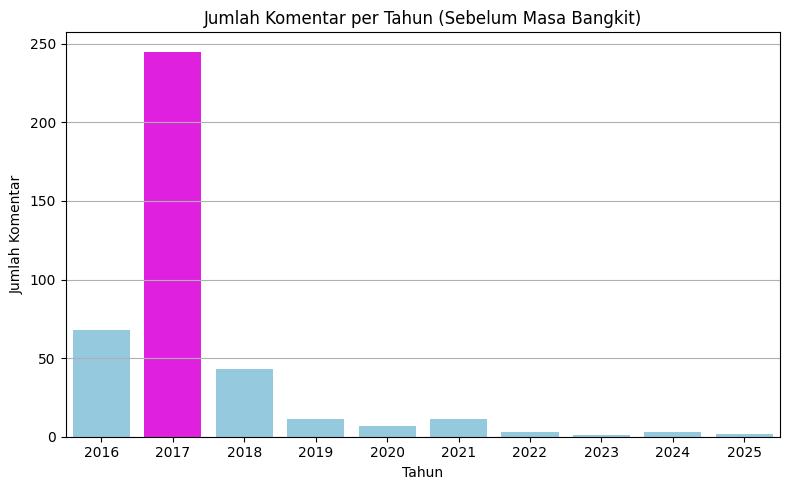

In [ ]:
# Pastikan kolom waktu dalam format datetime
df_before_cleaned['updated_at'] = pd.to_datetime(df_before_cleaned['updated_at'])

# Ekstrak tahun
df_before_cleaned['year'] = df_before_cleaned['updated_at'].dt.year

# Hitung jumlah komentar per tahun
before_counts = df_before_cleaned['year'].value_counts().sort_index()

# Buat list warna: ungu untuk 2017, lainnya biru muda
colors = ['magenta' if year == 2017 else 'skyblue' for year in before_counts.index]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=before_counts.index, y=before_counts.values, palette=colors)
plt.title('Jumlah Komentar per Tahun (Sebelum Masa Bangkit)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Komentar')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Pastikan kolom waktu dalam format datetime
df_before_cleaned['updated_at'] = pd.to_datetime(df_before_cleaned['updated_at'])

# Ekstrak tahun
df_before_cleaned['year'] = df_before_cleaned['updated_at'].dt.year

# Hitung jumlah komentar per tahun sebagai DataFrame
before_counts_df = df_before_cleaned['year'].value_counts().sort_index().reset_index()
before_counts_df.columns = ['Tahun', 'Jumlah Komentar']

# Tampilkan
print(before_counts_df)

   Tahun  Jumlah Komentar
0   2016               68
1   2017              245
2   2018               43
3   2019               11
4   2020                7
5   2021               11
6   2022                3
7   2023                1
8   2024                3
9   2025                2


#### **Insight:**
*   **Puncak di 2017:**
  
  Terdapat ledakan komentar yang sangat tinggi pada tahun 2017. Hal ini bisa dikaitkan dengan peluncuran Advan i5e pada akhir tahun 2016, smartphone ini merupakan keluaran terbaru smartphone 4G dari Advan, smartphone ini juga dibandrol dengan harga murah.
*   **Fase Stagnasi (2018-2022):**

  Setelah tahun 2017, volume komentar menurun drastis. Pada periode ini mencerminkan minimnya inovasi produk Advan di pasar yang semakin kompetitif. Ini juga bisa dikaitkan dengan adanya isu bangkrutnya brand Advan pada tahun 2019, tepatnya pada bulan Februari. Namun, isu tersebut tidak terbukti benar dan Advan melalui PT Bangga Teknologi Indonesia (BTI) membantah keras kabar tersebut.



### Setalah Masa Bangkit

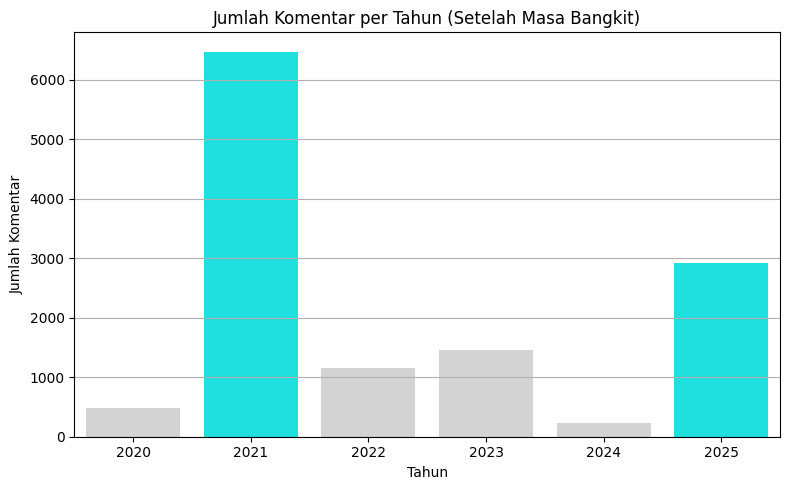

In [ ]:
# Pastikan kolom waktu dalam format datetime
df_after_cleaned['updated_at'] = pd.to_datetime(df_after_cleaned['updated_at'])

# Ekstrak tahun
df_after_cleaned['year'] = df_after_cleaned['updated_at'].dt.year

# Hitung jumlah komentar per tahun
after_counts = df_after_cleaned['year'].value_counts().sort_index()

# Buat list warna: hijau tua untuk 2021 dan 2025, lainnya hijau muda
colors = ['cyan' if year in [2021, 2025] else 'lightgrey' for year in after_counts.index]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=after_counts.index, y=after_counts.values, palette=colors)
plt.title('Jumlah Komentar per Tahun (Setelah Masa Bangkit)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Komentar')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Pastikan kolom waktu dalam format datetime
df_after_cleaned['updated_at'] = pd.to_datetime(df_after_cleaned['updated_at'])

# Ekstrak tahun
df_after_cleaned['year'] = df_after_cleaned['updated_at'].dt.year

# Hitung jumlah komentar per tahun sebagai DataFrame
after_counts_df = df_after_cleaned['year'].value_counts().sort_index().reset_index()
after_counts_df.columns = ['Tahun', 'Jumlah Komentar']

# Tambahkan kolom warna: cyan untuk 2021 dan 2025, lainnya lightgrey
after_counts_df['Warna'] = after_counts_df['Tahun'].apply(lambda x: 'cyan' if x in [2021, 2025] else 'lightgrey')

# Tampilkan
print(after_counts_df)

   Tahun  Jumlah Komentar      Warna
0   2020              490  lightgrey
1   2021             6475       cyan
2   2022             1148  lightgrey
3   2023             1464  lightgrey
4   2024              239  lightgrey
5   2025             2915       cyan


#### **Insight:**
*   **Pertumbuhan yang Konsisten:**

  Berbeda dengan adanya pola ledakan pada tahun 2017, grafik pada Masa Setelah Bangkit menunjukkan peningkatkan volume komentar yang bertahap mulai tahun 2023, walaupun terdapat lonjakan pada tahun 2021.

*   **Mengikuti Pasar:**
  Pada tahun 2021-2025 Advan berhenti di zona pasar smartphone umum dan beralih ke produk yang lebih spesifik dan inovantif, seperti smarphone gaming yang ramah dikantong, Advan Tablet, dan Advan Laptop Workplus, yang juga terintegrasi dengan AI.




## Distribusi Jumlah Views per Video

In [ ]:
# Sebelum Masa Bangkit
video_stats_before = df_before_cleaned.groupby('video_id')[
    ['video_view_count', 'video_like_count']
].first().sort_values(by='video_view_count', ascending=False)

# Sesudah Masa Bangkit
video_stats_after = df_after_cleaned.groupby('video_id')[
    ['video_view_count', 'video_like_count']
].first().sort_values(by='video_view_count', ascending=False)

In [ ]:
print("Sebelum Masa Bangkit:\n", video_stats_before)
print("Sesudah Masa Bangkit:\n", video_stats_after)

Sebelum Masa Bangkit:
              video_view_count  video_like_count
video_id                                       
zp9s8ZvyqPQ            196757              2568
sLMD8lIzayo             65896               571
Sesudah Masa Bangkit:
              video_view_count  video_like_count
video_id                                       
Z27dlq3H3hM           3066228             92000
5E4qGaWX0LU           1277312             30582
BxdZm7PUIaw            732164             14548
j_kSv6J0D4k            380898              5625
ofWSHfTYtVk            198531              6380
B8z0SHWkgMU            135763              1883
npDzS9mZlXI             84243              1565
bTljfq7VTQs             48760              1296
QY0rhBg5jzk             47399               619


### Sebelum Masa Bangkit

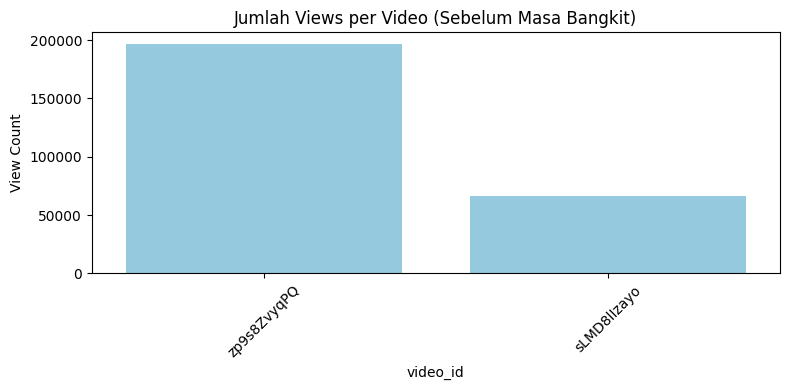

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=video_stats_before.index, y=video_stats_before['video_view_count'], color='skyblue')
plt.title('Jumlah Views per Video (Sebelum Masa Bangkit)')
plt.ylabel('View Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Insight:**

*   **Jangkauan Pasar Sangat Tergantung pada Popularitas Influencer:**
  
  Video GadgetIn (Review Advan i5E) berhasil menjangkau audiens yang jauh lebih besar (hampir 200.000 views) dibandingkan video lainnya. Ini menunjukkan bahwa pada periode ini, kemampuan Advan untuk "dilihat" oleh pasar sangat bergantung pada jangkauan organik dari kanal influencer besar, bukan karena kekuatan brand Advan itu sendiri.

*   **Potensi yang Tidak Termanfaatkan:**

  Meskipun video oleh Putu Reza (Review Advan i5A) memiliki view count yang lebih rendah (sekitar 66.000), angka ini sebenarnya cukup banyak. Hal ini terlihat adanya ketarikan masyarakat pada chanel Putu Reza, namun Advan gagal memperkuat sinyal ketertarikan ini lebih lanjut, menyebabkan potensi jangkauan yang lebih luas tidak tercapai.



### Sesudah Masa Bangkit

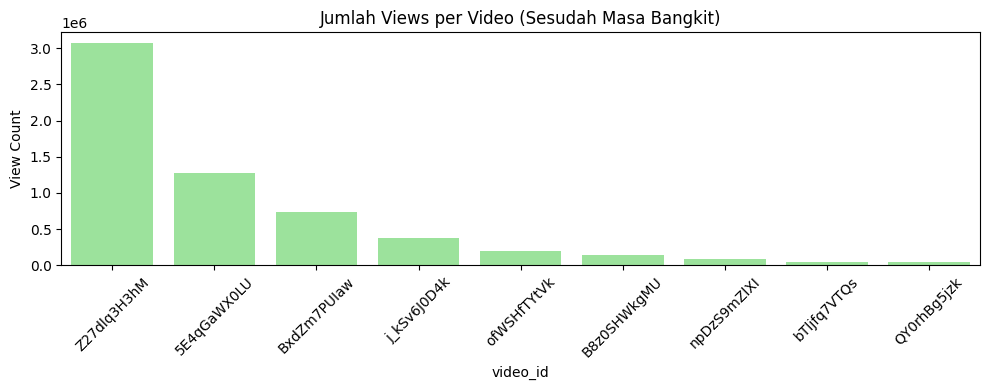

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x=video_stats_after.index, y=video_stats_after['video_view_count'], color='lightgreen')
plt.title('Jumlah Views per Video (Sesudah Masa Bangkit)')
plt.ylabel('View Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Insight:**

*   **Jangkauan Pasar yang Lebih Luas dan Berjenjang:**
  
  Periode ini menunjukkan keberhasilan strategi Advan dalam memperluas jangkauan pasarnya. Jika sebelumnya views hanya didominasi satu video, kini ada beberapa video yang berhasil menembus ratusan ribu hingga jutaan views. Video GadgetIn (Ribuan orang minta saya bahas HP LOKAL ini...) mencapai jangkauan terluas (lebih dari 1,2 juta views), diikuti oleh Jagat Review (REVIEW Advan Workplus dengan >700 ribu views) dan Pizza Gadget (Advan G5 : Hape Lokal Paling Keren? dengan >380 ribu views). Ini dapat disimpulkan: GadgetIn sebagai penarik massa, dan kanal lain sebagai penguat pesan.

*   **Produk Utama Menjadi Penggerak Views:**

  Konten dengan views tertinggi secara konsisten adalah yang mengulas produk-produk dari era baru Advan. Video tentang Advan Workplus oleh Jagat Review menjadi bukti paling kuat, menunjukkan bahwa ada permintaan pasar yang sangat besar untuk kategori produk baru Advan (laptop). Ini membuktikan bahwa strategi diversifikasi produk Advan sangat tepat dan berhasil menarik minat audiens yang lebih luas di luar segmen smartphone.



## Distribusi Jumlah Like per Video

### Sebelum Masa Bangkit

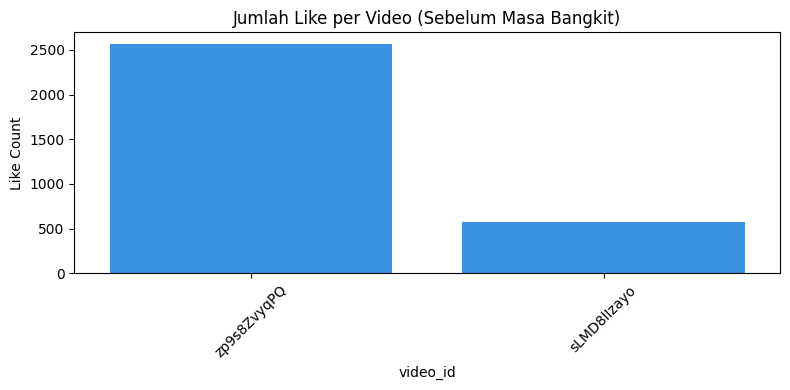

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=video_stats_before.index, y=video_stats_before['video_like_count'], color='dodgerblue')
plt.title('Jumlah Like per Video (Sebelum Masa Bangkit)')
plt.ylabel('Like Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Insight:**

**Keberhasilan Sangat Bergantung pada Influencer:**

*   Grafik menunjukkan bahwa engagement
publik (like) sangat tergantung dan didominasi oleh satu video, yaitu "Review Advan i5E - Melebihi Ekspektasi" dari chanel GadgetIn. Ini membuktikan bahwa pada masa itu, brand Advan sangat tergantung pada influencer besar untuk menciptakan 'fenomena'.

*   Terdapat kesejangan pada video lainnya (review Advan i5A oleh Putu Reza), padahal membahas tipe smartphone. Hal ini lagi-lagi membuktikan bahwa brand Advan sangat tergantung pada nama influencer besar.

### Sesudah Masa Bangkit

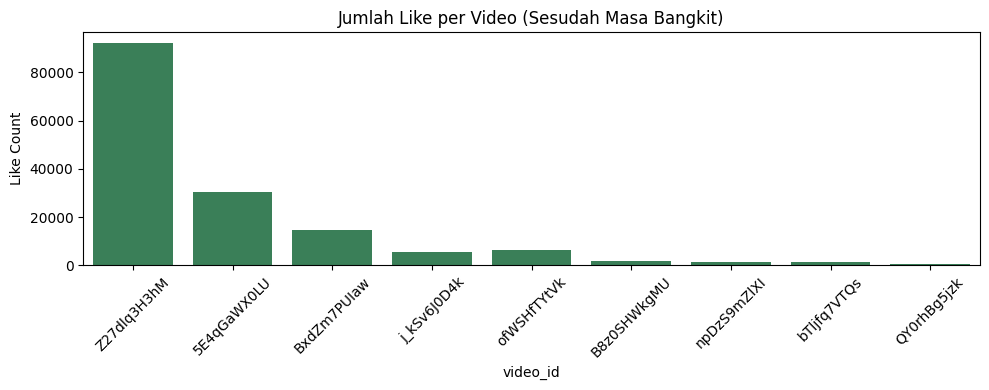

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x=video_stats_after.index, y=video_stats_after['video_like_count'], color='seagreen')
plt.title('Jumlah Like per Video (Sesudah Masa Bangkit)')
plt.ylabel('Like Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 #### **Insight:**


*   **Transformasi dari Ketergantungan Tunggal menjadi Ekosistem Konten yang Sehat:**

    Berbeda dengan periode sebelumnya, yang hanya bergantung pada satu video, periode waktu ini menunjukkan adanya beberapa pilar konten yang kuat.  Meskipun video dari GadgetIn (Ribuan orang minta saya bahas HP LOKAL ini...) masih menjadi juara, kini ia didukung oleh video-video sukses lainnya dari kanal besar seperti Jagat Review (REVIEW Advan Workplus) dan Sobat HAPE (Disaat ADVAN lebih baik dari XIAOMI). Ini membuktikan Advan telah berhasil membangun ekosistem engagement yang jauh lebih sehat dan tidak berisiko tinggi.



## Engagement Rate Per Video.

In [ ]:
video_stats_after['like_to_view_ratio'] = video_stats_after['video_like_count'] / video_stats_after['video_view_count']

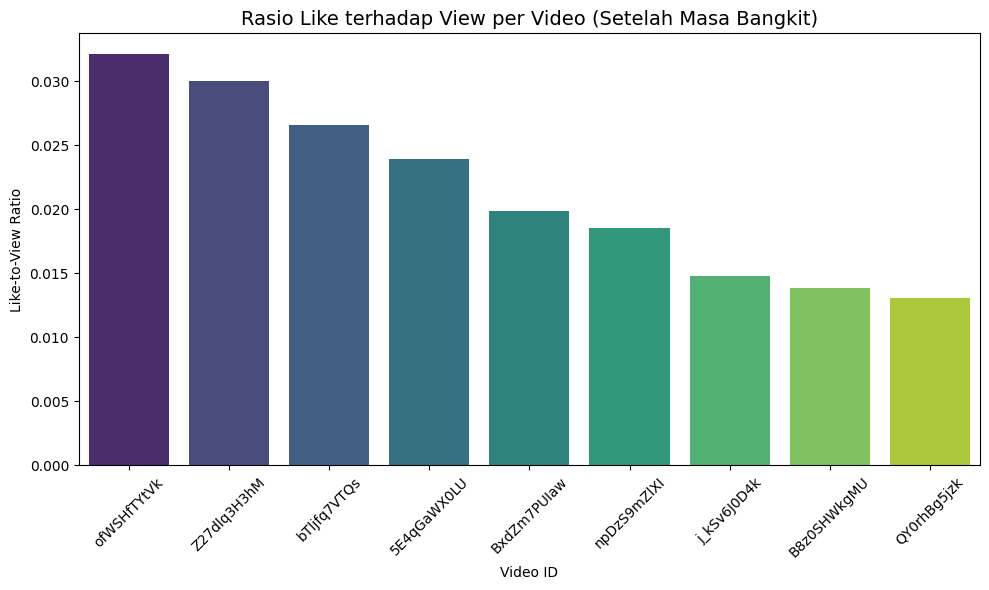

In [ ]:
# Sort by ratio (biar urut)
video_stats_after_sorted = video_stats_after.sort_values(by='like_to_view_ratio', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=video_stats_after_sorted,
    x='video_id',
    y='like_to_view_ratio',
    palette='viridis'
)

plt.title('Rasio Like terhadap View per Video (Setelah Masa Bangkit)', fontsize=14)
plt.xlabel('Video ID')
plt.ylabel('Like-to-View Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Insight:**

*   **Cakupan Luas Belum Tentu Memberi Dampak yang Bermakna:**
  
  Ini adalah insight paling krusial. Video dengan views terbanyak adalah "HP lokal ga pernah sebagus ini! Review Advan GX!" dari GadgetIn. Namun, video dengan rasio like-to-view tertinggi (artinya audiensnya paling terkesan) adalah "Disaat ADVAN lebih baik dari XIAOMI" dari Sobat HAPE. Ini membuktikan bahwa meskipun GadgetIn berhasil menjangkau audiens terluas, konten dari Sobat HAPE-lah yang pesannya paling kuat dan paling berhasil meyakinkan penontonnya.

*   **Strategi Efektif untuk Meningkatkan Engagement:**

  Judul video Sobat HAPE yang secara langsung membandingkan Advan dengan Xiaomi adalah pemicu utama tingginya rasio likes. Ini menunjukkan bahwa audiens sangat menghargai konten yang berani, jujur, dan memberikan perbandingan langsung yang membantu mereka membuat keputusan. Narasi "brand lokal menantang raksasa" terbukti sangat efektif dalam membangun koneksi emosional dan apresiasi dari penonton.  



## Top Words (Term Frequency & WordCloud)

In [ ]:
def get_top_n_words(corpus, n=30):
    vec = CountVectorizer()
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(words_freq[:n], columns=['word', 'frequency'])

In [ ]:
top_words_before = get_top_n_words(df_before_cleaned['stopword_manual'], 30)
top_words_after = get_top_n_words(df_after_cleaned['stopword_manual'], 30)

def plot_top_words(df_top_words, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(y='word', x='frequency', data=df_top_words, palette='magma')
    plt.title(title)
    plt.xlabel('Frekuensi')
    plt.ylabel('Kata')
    plt.tight_layout()
    plt.show()

In [ ]:
def generate_wordcloud(corpus, title):
    text = " ".join(corpus)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.tight_layout(pad=0)
    plt.show()

### Top words Sebelum Masa Bangkit

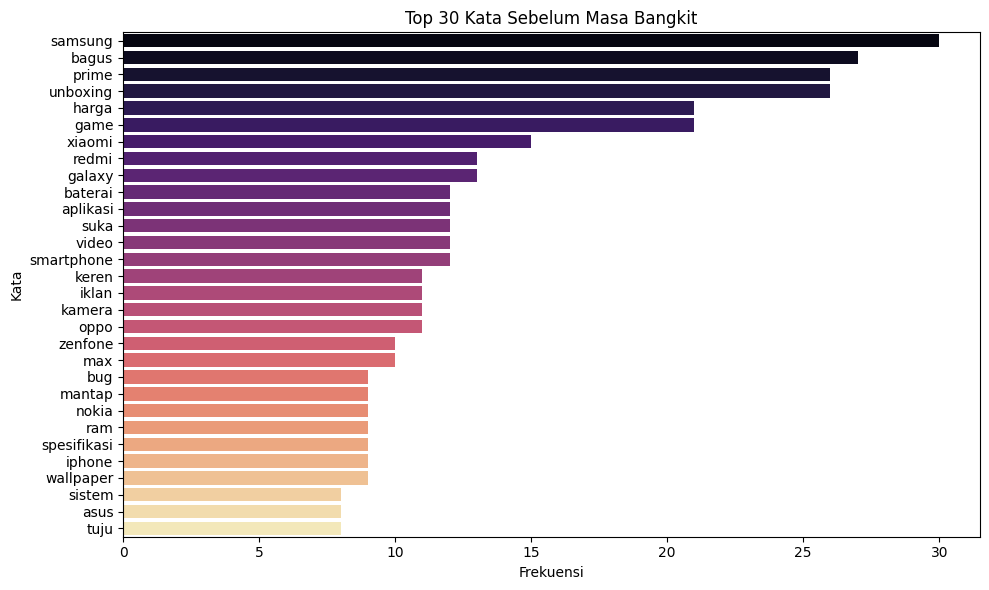

In [ ]:
plot_top_words(top_words_before, 'Top 30 Kata Sebelum Masa Bangkit')

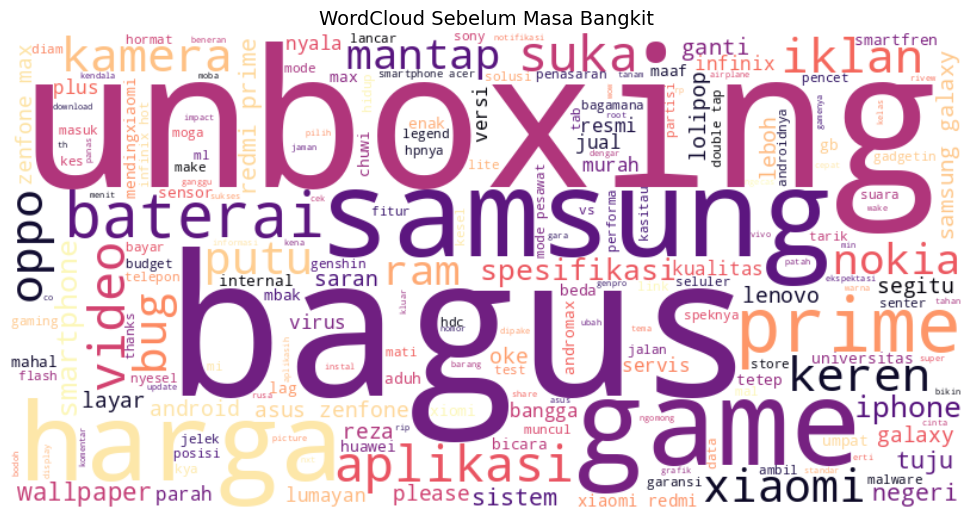

In [ ]:
generate_wordcloud(df_before_cleaned['stopword_manual'], 'WordCloud Sebelum Masa Bangkit')

#### **Insight:**

*   **Dominasi Kompetitor:**

  Kata yang paling sering muncul adalah samsung, diikuti oleh nama brand lain seperti xiaomi dan oppo. Ini menginterpretasikan bahwa pada masa itu, Advan selalu berada di bawah bayang-bayang dan terus-menerus dibandingkan dengan pemimpin pasar. Identitas brand Advan belum kuat untuk berdiri sendiri.

*   **Fokus pada Harga & Spesifikasi:**
  
  Percakapan publik sangat terfokus pada atribut fungsional dan dasar, seperti harga, baterai, kamera, dan kemampuan untuk game. Ini menunjukkan konsumen menilai Advan murni dari kacamata "spesifikasi vs harga", belum ada koneksi emosional atau citra brand premium yang terbentuk.

*   **Pujian Bersyarat:**
  
  Meskipun kata bagus muncul secara signifikan, kemunculannya bersamaan dengan harga menandakan sebuah pujian yang bersyarat. Kalimatnya bukan "Advan itu bagus", melainkan lebih ke arah "Untuk harganya, Advan itu bagus". Ini adalah pujian untuk value-for-money, bukan untuk kualitas absolut.






### Top Word Setelah Masa Bangkit

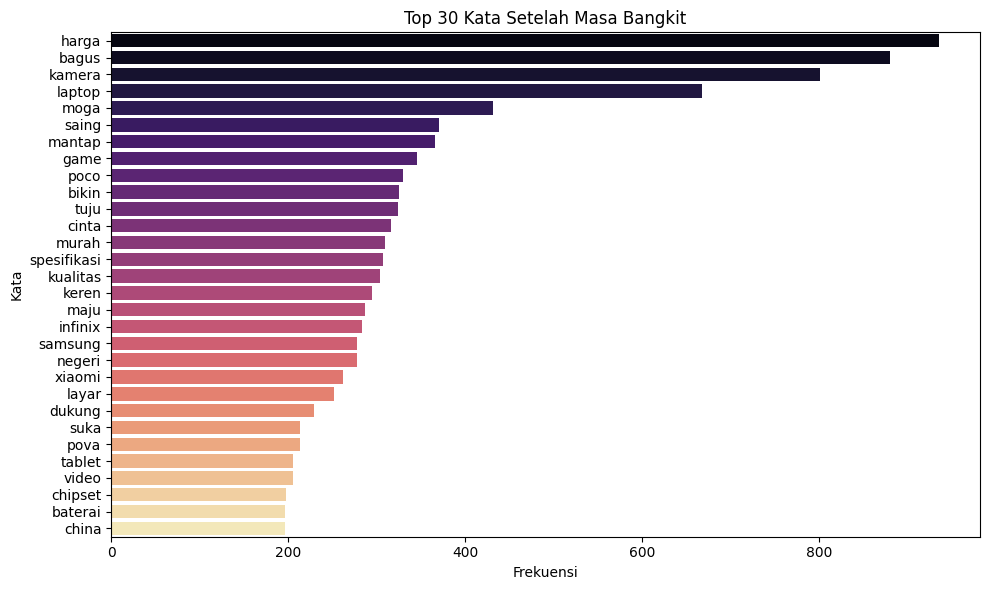

In [ ]:
plot_top_words(top_words_after, 'Top 30 Kata Setelah Masa Bangkit')

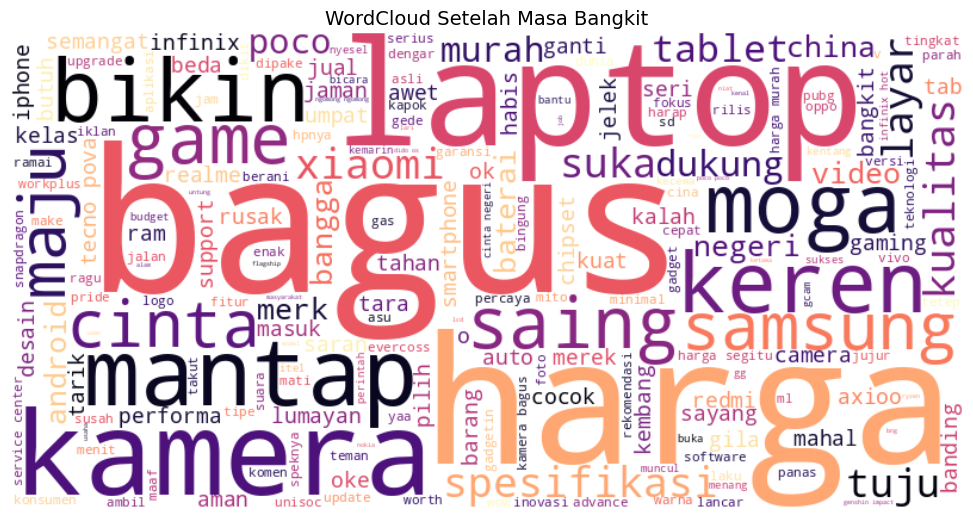

In [ ]:
generate_wordcloud(df_after_cleaned['stopword_manual'], 'WordCloud Setelah Masa Bangkit')

#### **Insight:**

*   **Pergeseran Fokus Produk yang Sukses:**
  
  Kata laptop kini menjadi salah satu topik paling dominan. Ini adalah bukti kuantitatif bahwa strategi diversifikasi Advan ke kategori baru di luar smartphone telah sangat berhasil dan menjadi bagian utama dari citra baru brand di benak konsumen.

*  **Lahirnya Sentimen Emosional & Dukungan Nasional:**

  Berbeda total dari sebelumnya, kini muncul banyak kata-kata emosional positif seperti bangga, cinta, dukung, maju, dan negeri. Ini menginterpretasikan bahwa kebangkitan Advan tidak hanya dinilai dari produknya, tetapi juga berhasil membangkitkan sentimen nasionalisme dan dukungan emosional dari publik yang ingin melihat brand lokal bersaing.

*   **Kompetitif yang Lebih Luas:**
  
  Dominasi mutlak samsung dari periode sebelumnya telah runtuh. Meskipun perbandingan masih ada, Advan kini dibicarakan dalam konteks persaingan yang lebih luas (saing, poco, infinix) dengan identitas yang jauh lebih kuat dan mandiri, bukan lagi sekadar sebagai alternatif murah dari satu merk saja.







# Analisis Sentimen

### Distribusi Sentimen Sebelum Masa Bangkit

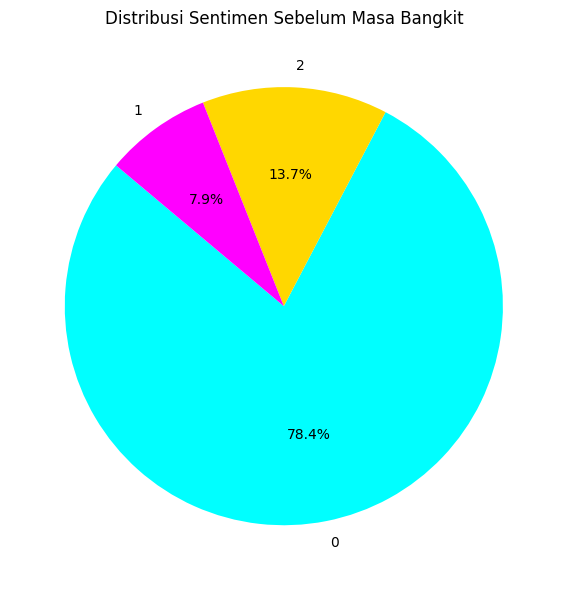

In [ ]:
# Hitung jumlah komentar per kategori sentimen
sentiment_counts = df_before_cleaned['sentiment'].value_counts()

# Buat list warna manual sesuai urutan label
custom_colors = ['cyan', 'gold', 'magenta']  # urutan sesuai index 0, 1, 2

# Buat pie chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=custom_colors)

plt.title('Distribusi Sentimen Sebelum Masa Bangkit')
plt.tight_layout()
plt.show()


*(Asumsi: 0 = Netral, 1 = Negatif, 2 = Positif)*

#### **Insight:**

*   **Dominasi Sentimen Netral (78.4%):**

    Sebagian besar percakapan tentang Advan pada periode ini bersifat netral. Ini menginterpretasikan bahwa brand hanya disebutkan secara faktual (misal: "harga Advan sekian"), tanpa adanya ikatan emosional yang kuat dari publik.

*   **Sentimen Positif Unggul Tipis:**

    Sentimen positif (13.7%) lebih banyak daripada sentimen negatif (7.9%). Ini menandakan bahwa citra dasar Advan sebenarnya tidak buruk, hanya saja tidak menarik perhatian yang cukup.



*   **Brand Terlupakan:**
  
    Proporsi sentimen netral yang sangat tinggi ini adalah tanda kuantitatif dari brand yang 'terlupakan'. Publik tidak merasa cukup peduli untuk mencintai ataupun membenci produknya, yang menjadi tantangan terbesar Advan pada masa itu.

### Distribusi Sentimen Sesudah Rebranding Advan

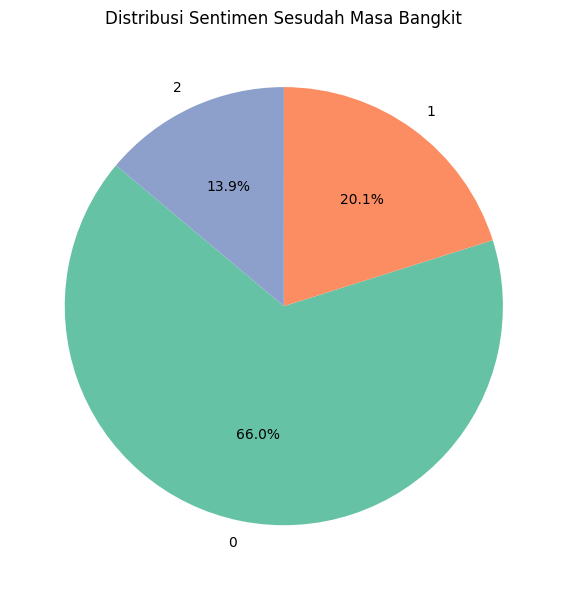

In [ ]:
# Hitung jumlah komentar per kategori sentimen
sentiment_counts = df_after_cleaned['sentiment'].value_counts()

# Buat pie chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Set2.colors)

plt.title('Distribusi Sentimen Sesudah Masa Bangkit')
plt.tight_layout()
plt.show()

*(Asumsi: 0 = Netral, 1 = Negatif, 2 = Positif)*

#### **Insight:**

*   **Lonjakan Sentimen Negatif sebagai Konsekuensi:**

    Poin paling krusial adalah sentimen negatif melonjak signifikan (dari 7.9% menjadi 20.1%). Brand yang lebih besar dan relevan secara alami akan menarik lebih banyak kritik, keluhan, dan ekspektasi yang lebih tinggi dari konsumen.


*   **Citra Positif yang Bertahan:**

    Meskipun ada lonjakan kritik, sentimen positif tetap stabil di angka 13.9%. Ini menandakan periode ini berhasil menarik perhatian besar tanpa mengorbankan basis citra positif yang sudah ada. Advan kini menjadi brand yang lebih 'hidup' dan memancing diskusi, yang jauh lebih baik daripada diabaikan.



### Timeline Sentimen Publik terhadap Advan (Per Tahun)

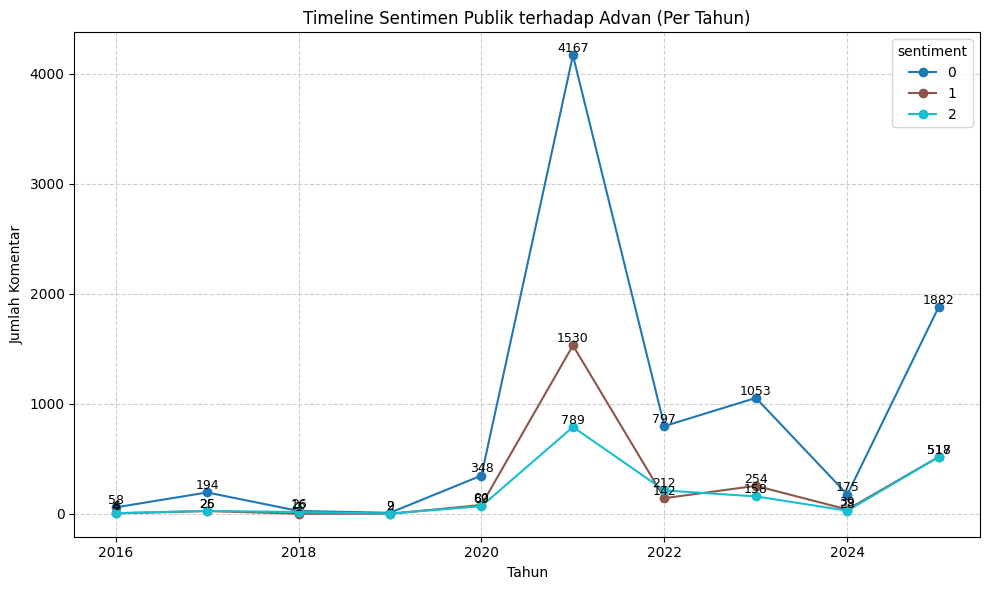

In [ ]:
# Tambahkan kolom tahun
df_before_cleaned['tahun'] = df_before_cleaned['updated_at'].dt.year
df_after_cleaned['tahun'] = df_after_cleaned['updated_at'].dt.year

# Gabungkan
df_sentiment_year = pd.concat([df_before_cleaned, df_after_cleaned])

# Hitung jumlah sentimen per tahun
timeline = df_sentiment_year.groupby(['tahun', 'sentiment']).size().unstack().fillna(0)

# Plot
ax = timeline.plot(kind='line', marker='o', figsize=(10,6), colormap='tab10')
plt.title('Timeline Sentimen Publik terhadap Advan (Per Tahun)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Komentar')
plt.grid(True, linestyle='--', alpha=0.6)

# Tambahkan nilai eksak di setiap titik
for sentiment in timeline.columns:
    for tahun in timeline.index:
        nilai = timeline.loc[tahun, sentiment]
        if nilai > 0:  # tampilkan hanya jika ada nilainya
            ax.text(tahun, nilai + 1, int(nilai), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Tambahkan kolom tahun
df_before_cleaned['tahun'] = df_before_cleaned['updated_at'].dt.year
df_after_cleaned['tahun'] = df_after_cleaned['updated_at'].dt.year

# Gabungkan kedua data
df_sentiment_year = pd.concat([df_before_cleaned, df_after_cleaned])

# Hitung jumlah komentar per tahun dan sentimen
timeline_df = df_sentiment_year.groupby(['tahun', 'sentiment']).size().unstack().fillna(0).astype(int)

# Tampilkan hasilnya
print(timeline_df)


sentiment     0     1    2
tahun                     
2016         58     4    6
2017        194    25   26
2018         26     1   16
2019          9     0    2
2020        348    80   69
2021       4167  1530  789
2022        797   142  212
2023       1053   254  158
2024        175    39   28
2025       1882   518  517


#### **Insight:**

*   **Titik Balik Strategis di Tahun 2021:**

    Tahun 2021 menandai titik balik dalam perjalanan reputasi Advan. Visualisasi data menunjukkan lonjakan signifikan pada seluruh jenis sentimen, menandakan kebangkitan merek yang sebelumnya berada dalam fase stagnasi. Fase ini dapat dianalogikan sebagai momen kebangkitan yang mengawali era baru Advan di ranah digital. Perubahan ini merepresentasikan upaya strategis perusahaan untuk merebut kembali perhatian pasar yang lebih agresif.

*   **Pertumbuhan Reputasi:**

    Meski terjadi fluktuasi sentimen, tren positif memperlihatkan pola yang paling stabil dan progresif. Sejak puncak awal pada 2021, sentimen positif berhasil mempertahankan fondasi baru yang kuat dan terus mengalami peningkatan, khususnya dari tahun 2023 ke 2024.

*   **Hasil Ketenaran:**

    Fenomena peningkatan sentimen negatif pasca-2021 menunjukkan bahwa lonjakan popularitas diiringi dengan meningkatnya kritik publik. Sebelum 2020, nyaris tidak ada kritik yang signifikan terhadap Advan. Namun, setelah menjadi kembali relevan, ekspektasi publik pun meningkat—dan kritik menjadi bagian tak terhindarkan dari dinamika reputasi merek.







# Topic Modeling

##Before

In [ ]:
df_before_bert

,sentiment,text,cleaned_text
0,0,"Halo gaes David dsini, 8 tahun yang lalu 😢😢",halo gaes david dsini 8 tahun yang lalu
1,0,Jirr,jirr
2,0,"hp lama gw, skrg batrenya udh kembung wkwkwk",hp lama gw skrg batrenya udh kembung wkwkwk
3,0,Lah gua masih nonton 2025🎉🎉🎉,lah gua masih nonton 2025
4,0,Hp Android pertama gw,hp android pertama gw
...,...,...,...
413,0,petromax,petromax
414,0,dobe dobe,dobe dobe
415,0,cendol gan,cendol gan
416,0,pertamax,pertamax


In [ ]:
text = df_before_bert['cleaned_text']
text

,cleaned_text
0,halo gaes david dsini 8 tahun yang lalu
1,jirr
2,hp lama gw skrg batrenya udh kembung wkwkwk
3,lah gua masih nonton 2025
4,hp android pertama gw
...,...
413,petromax
414,dobe dobe
415,cendol gan
416,pertamax


In [ ]:
text = text.astype(str).tolist()

In [ ]:
# Inisialisasi model UMAP dengan random_state
umap_model = UMAP(n_neighbors=10,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=37)

# Inisialisasi model clustering HDBSCAN dengan random_state
hdbscan_model = HDBSCAN(min_cluster_size=8,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

# Inisialisasi BERTopic dengan model yang sudah disetel random_state
topic_model = BERTopic(
    language="indonesian",
    calculate_probabilities=True,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
)

# Fit model
topics, probs = topic_model.fit_transform(text)

# Tampilkan topik dominan
topic_model.get_topic_info()

2025-07-17 16:20:19,557 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

2025-07-17 16:20:53,848 - BERTopic - Embedding - Completed ✓
2025-07-17 16:20:53,850 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-17 16:21:03,579 - BERTopic - Dimensionality - Completed ✓
2025-07-17 16:21:03,581 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-17 16:21:03,617 - BERTopic - Cluster - Completed ✓
2025-07-17 16:21:03,622 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-17 16:21:03,647 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,4,-1_posisi_belakang_atas_bug,"[posisi, belakang, atas, bug, kamera, coba, bo...","[bang bsa pake smartfreen egak, bug yg sangat ..."
1,0,209,0_hp_saya_di_nya,"[hp, saya, di, nya, yg, ada, bang, gak, ini, itu]",[14 jt kamera di bilang lumayan itu udah bagu...
2,1,96,1_review_bang_dong_advan,"[review, bang, dong, advan, unboxing, max, red...","[bang coba review advan g1 ya, unboxing dan re..."
3,2,66,2_samsung_review_galaxy_dong,"[samsung, review, galaxy, dong, smartphone, no...","[ditunggu review samsung j2 prime nya bang, ba..."
4,3,13,3_ram_10gb_10_partisi,"[ram, 10gb, 10, partisi, gb, system, sistem, m...",[gileee system makan 10 gb smartphone gilee ...
5,4,11,4_wallpaper_dmn_itu_apa,"[wallpaper, dmn, itu, apa, green, linknya, dol...","[itu pake wallpaper apa siih, itu wallpaper gr..."
6,5,10,5_video_ini_nonton_donk,"[video, ini, nonton, donk, advan, i5e, blum, i...","[gua nonton ini video pake advan i5e heheheh, ..."
7,6,9,6_j2_prime_kapan_versi,"[j2, prime, kapan, versi, bang, review, nya, a...","[bang j2 prime kapan reviewnya, review j2 prim..."


In [ ]:
topic_model.visualize_topics().show()

In [ ]:
topic_model.visualize_barchart(top_n_topics=10)

*   **Topic 1 (review | bang | advan | Unboxing):**
   
    Meminta content creator membuat review tentang advan seri yang lain.

*   **Topic 2 (samsung | review | galaxy | smartphone):**

    Meminta content creator membuat review tentang hp samsung.

*   **Topic 3 (ram | 10gb | partisi | gb):**

    Memberikan kritik tentang OS Advan memakan storage 10GB

**Kesimpulan:**

Komentar didominasi oleh permintaan viewer kepada content creator untuk mereview suatu produk gadget tertentu dan ada juga komentar seputar kritikan OS HandPhone Advan yang memakan banyak penyimpanan internal.




## After

In [ ]:
df_after_bert

,sentiment,text,cleaned_text
0,0,Bisa dibeli di:\n\n- Shopee: https://invol.co/...,bisa dibeli di shopee bekas review kadang dij...
1,0,"Dan sekarang harganya udah turun, gw beli 650k...",dan sekarang harganya udah turun gw beli 650k ...
2,0,Itu tablet bisa main Roblox g bang?,itu tablet bisa main roblox g bang
3,0,"Kalo gak disetup dulu dan langsung online, jad...",kalo gak disetup dulu dan langsung online jadi...
4,0,bisa Split Screen bang ? thanks,bisa split screen bang thanks
...,...,...,...
13386,0,Firs,firs
13387,0,Pertama,pertama
13388,0,Wehhh,wehhh
13389,0,Akhirnya,akhirnya


### Netral

In [ ]:
text_net2 = df_after_bert[df_after_bert['sentiment'] == 0]

In [ ]:
texta1 = text_net2['cleaned_text']
texta1

,cleaned_text
0,bisa dibeli di shopee bekas review kadang dij...
1,dan sekarang harganya udah turun gw beli 650k ...
2,itu tablet bisa main roblox g bang
3,kalo gak disetup dulu dan langsung online jadi...
4,bisa split screen bang thanks
...,...
13386,firs
13387,pertama
13388,wehhh
13389,akhirnya


In [ ]:
texta1 = texta1.astype(str).tolist()

In [ ]:
# Inisialisasi model UMAP dengan random_state
umap_model = UMAP(n_neighbors=20,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=37)

# Inisialisasi model clustering HDBSCAN dengan random_state
hdbscan_model = HDBSCAN(min_cluster_size=15,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

# Inisialisasi BERTopic dengan model yang sudah disetel random_state
topic_modeln1 = BERTopic(
    language="indonesian",
    calculate_probabilities=True,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
)

# Fit model
topics, probs = topic_modeln1.fit_transform(texta1)

# Tampilkan topik dominan
topic_modeln1.get_topic_info()

2025-07-17 16:21:05,628 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/280 [00:00<?, ?it/s]

2025-07-17 16:24:11,908 - BERTopic - Embedding - Completed ✓
2025-07-17 16:24:11,910 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-17 16:25:12,995 - BERTopic - Dimensionality - Completed ✓
2025-07-17 16:25:12,997 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-17 16:25:17,412 - BERTopic - Cluster - Completed ✓
2025-07-17 16:25:17,421 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-17 16:25:17,631 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1692,-1_bisa_advan_di_bang,"[bisa, advan, di, bang, yg, beli, dan, ini, ny...",[gile sih ini spek mirip axioo z series tapi h...
1,0,1480,0_nih_advan_os_ya,"[nih, advan, os, ya, lu, gw, wkwkwk, kok, apa,...","[kenapa w gk pernah dapet like banyak wkwk, di..."
2,1,672,1_hp_lokal_review_bang,"[hp, lokal, review, bang, buat, advan, yg, cob...","[bang hp tecno pova 7 dong, bang review hp tec..."
3,2,343,2_kamera_kameranya_camera_foto,"[kamera, kameranya, camera, foto, penting, bag...","[kameranya , brand lokal yang punya kamera bag..."
4,3,333,3_laptop_ini_yang_saya,"[laptop, ini, yang, saya, untuk, workplus, dan...",[halo ganagan numpang nanya nih untuk laptop p...
...,...,...,...,...,...
81,80,19,80_gadgetin_gadget_direview_in,"[gadgetin, gadget, direview, in, centang, bang...","[kalo direview sama gadgetin auto goib, knp ka..."
82,81,18,81_bocil_epep_cocok_360,"[bocil, epep, cocok, 360, stylus, buat, ff, ef...","[buat bocil main epep kali ya, cocok nih buat ..."
83,82,18,82_mntpp_cty_pppp_ntaps,"[mntpp, cty, pppp, ntaps, perostinx, mntp, han...","[cty, pppp, perostinx handal]"
84,83,18,83_17_ngakak_sambil_lucunya,"[17, ngakak, sambil, lucunya, upload, ginian, ...",[tolong ini udah di level dewa lucunya pas ne...


In [ ]:
AN =  topic_modeln1.get_topic_info()
AN.head(25)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1692,-1_bisa_advan_di_bang,"[bisa, advan, di, bang, yg, beli, dan, ini, ny...",[gile sih ini spek mirip axioo z series tapi h...
1,0,1480,0_nih_advan_os_ya,"[nih, advan, os, ya, lu, gw, wkwkwk, kok, apa,...","[kenapa w gk pernah dapet like banyak wkwk, di..."
2,1,672,1_hp_lokal_review_bang,"[hp, lokal, review, bang, buat, advan, yg, cob...","[bang hp tecno pova 7 dong, bang review hp tec..."
3,2,343,2_kamera_kameranya_camera_foto,"[kamera, kameranya, camera, foto, penting, bag...","[kameranya , brand lokal yang punya kamera bag..."
4,3,333,3_laptop_ini_yang_saya,"[laptop, ini, yang, saya, untuk, workplus, dan...",[halo ganagan numpang nanya nih untuk laptop p...
5,4,262,4_lokal_brand_produk_local,"[lokal, brand, produk, local, cintai, bersaing...","[cintai produk lokal, cintai produk lokal, cin..."
6,5,235,5_game_main_setan_gaming,"[game, main, setan, gaming, test, genshin, bua...","[genshin game setan, genshin game setan, buat..."
7,6,192,6_g9_g5_pro_5g,"[g9, g5, pro, 5g, gx, advan, g10, mana, redmi,...","[bang david coba review advan g9 pro, advan g9..."
8,7,155,7_870_setara_816_248,"[870, setara, 816, 248, 818, 338, 723, 500, 82...",[ternyata nggak setara 870 makanya kok aneh ha...
9,8,148,8_samsung_a22_galaxy_5g,"[samsung, a22, galaxy, 5g, review, tab, nokia,...","[review samsung a22 bang, bang review samsung ..."


In [ ]:
topic_modeln1.visualize_topics().show()

In [ ]:
topic_modeln1.visualize_barchart(top_n_topics=10)



*   **Topic 1 (hp | lokal | review | bang | buat):**
    
    Meminta content creator membuat review tentang hp selain advan

*   **Topic 2 (samsung | a22 | galaxy | 5g | review):**

    Meminta content creator membuat review tentang hp samsung.

*   **Topic 3 (game | main | setan | gaming | test):**

    Membicarakan uji coba hp advan dengan game genshin impact dan lain-lain.

**Kesimpulan:**

Komentar didominasi oleh permintaan viewer kepada content creator untuk mereview suatu produk gadget tertentu dan ada juga komentar seputar menguji kualitas produk dengan memainkan game






###Positif

In [ ]:
text_pos2 = df_after_bert[df_after_bert['sentiment'] == 1]

In [ ]:
texta2 = text_pos2['cleaned_text']
texta2

,cleaned_text
40,design nya sih keren banget mirip2 mi pad 4 ...
42,bangga buatan indonesia
43,mantap banget
44,mantap bosqu reviewnya tablad advan t8
45,bagus
...,...
13330,wow
13349,wih
13350,yes advan
13352,advan emang the best


In [ ]:
texta2 = texta2.astype(str).tolist()

In [ ]:
# Inisialisasi model UMAP dengan random_state
umap_model = UMAP(n_neighbors=20,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=37)

# Inisialisasi model clustering HDBSCAN dengan random_state
hdbscan_model = HDBSCAN(min_cluster_size=15,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

# Inisialisasi BERTopic dengan model yang sudah disetel random_state
topic_modelp1 = BERTopic(
    language="indonesian",
    calculate_probabilities=True,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
)

# Fit model
topics, probs = topic_modelp1.fit_transform(texta2)

# Tampilkan topik dominan
topic_modelp1.get_topic_info()

2025-07-17 16:25:18,645 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

2025-07-17 16:26:24,710 - BERTopic - Embedding - Completed ✓
2025-07-17 16:26:24,714 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-17 16:26:50,082 - BERTopic - Dimensionality - Completed ✓
2025-07-17 16:26:50,084 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-17 16:26:50,542 - BERTopic - Cluster - Completed ✓
2025-07-17 16:26:50,550 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-17 16:26:50,678 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,706,-1_advan_ini_keren_dan,"[advan, ini, keren, dan, hp, saya, beli, yang,...",[opini pribadi buat advan di laptop yang menar...
1,0,367,0_lokal_brand_produk_local,"[lokal, brand, produk, local, dalam, yg, bisa,...","[semangat produk lokal, semangat brand lokal ,..."
2,1,191,1_indonesia_produk_dan_maju,"[indonesia, produk, dan, maju, advan, buatan, ...","[mantap maju terus produk indonesia , kita duk..."
3,2,190,2_hp_lokal_bisa_di,"[hp, lokal, bisa, di, advan, buat, gw, ini, yg...","[itu hp gw yang lagi gw pake, tapi menurut ku ..."
4,3,103,3_laptop_ini_harga_di,"[laptop, ini, harga, di, laptopnya, yg, advan,...",[fun fact setelah nonton dan yakinin buat beli...
5,4,87,4_android_samsung_smartphone_pertama,"[android, samsung, smartphone, pertama, iphone...",[inget waktu dulu pernah pakai advan andromax ...
6,5,84,5_terus_maju_baik_semoga,"[terus, maju, baik, semoga, advan, berkembang,...","[semoga advan makin berkembang terus, semoga a..."
7,6,82,6_kamera_kameranya_tinggal_di,"[kamera, kameranya, tinggal, di, nya, camera, ...",[awal yang bagus buat brand lokal lah ya perfo...
8,7,76,7_game_gaming_buat_main,"[game, gaming, buat, main, cocok, yg, gamer, s...","[mantap ni buat game, cocok buat hp anak yg la..."
9,8,71,8_advan_gw_barca_nih,"[advan, gw, barca, nih, otw, beli, make, jg, l...",[jangan lupain advan barca x barcelona hype ab...


In [ ]:
AP =  topic_modelp1.get_topic_info()
AP.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,706,-1_advan_ini_keren_dan,"[advan, ini, keren, dan, hp, saya, beli, yang,...",[opini pribadi buat advan di laptop yang menar...
1,0,367,0_lokal_brand_produk_local,"[lokal, brand, produk, local, dalam, yg, bisa,...","[semangat produk lokal, semangat brand lokal ,..."
2,1,191,1_indonesia_produk_dan_maju,"[indonesia, produk, dan, maju, advan, buatan, ...","[mantap maju terus produk indonesia , kita duk..."
3,2,190,2_hp_lokal_bisa_di,"[hp, lokal, bisa, di, advan, buat, gw, ini, yg...","[itu hp gw yang lagi gw pake, tapi menurut ku ..."
4,3,103,3_laptop_ini_harga_di,"[laptop, ini, harga, di, laptopnya, yg, advan,...",[fun fact setelah nonton dan yakinin buat beli...
5,4,87,4_android_samsung_smartphone_pertama,"[android, samsung, smartphone, pertama, iphone...",[inget waktu dulu pernah pakai advan andromax ...
6,5,84,5_terus_maju_baik_semoga,"[terus, maju, baik, semoga, advan, berkembang,...","[semoga advan makin berkembang terus, semoga a..."
7,6,82,6_kamera_kameranya_tinggal_di,"[kamera, kameranya, tinggal, di, nya, camera, ...",[awal yang bagus buat brand lokal lah ya perfo...
8,7,76,7_game_gaming_buat_main,"[game, gaming, buat, main, cocok, yg, gamer, s...","[mantap ni buat game, cocok buat hp anak yg la..."
9,8,71,8_advan_gw_barca_nih,"[advan, gw, barca, nih, otw, beli, make, jg, l...",[jangan lupain advan barca x barcelona hype ab...


In [ ]:
topic_modelp1.visualize_topics().show()

In [ ]:
topic_modelp1.visualize_barchart(top_n_topics=10)



*   **Topic 1 (mantap | keren | advan):**
    
    Memberikan tanggapan positif tentang brand Advan yang semakin inovatif.

*   **Topic 2 (ram | harga | helio | segitu | it):**

    Membicarakan spesifikasi Advan yang lumayan bagus dengan harga yang terjangkau



*   **Topic 3 (murah | harga | worth | segitu | it):**

    Membicarakan harga Advan yang terjangkau untuk kelas menengah ke bawah

*   **Topic 4 (indonesia | produk | dan | maju | advan):**
    Memberikan apresiasi dan semangat untuk memajukan produk lokal Advan.

**Kesimpulan:**

Komentar didominasi oleh tang gapan positif dari viewer tentang brand Advan, baik dari segi inovast, harga terjangicau, maupun apresiasi dan memberikan semangat demi kesuksesan produk lokal Advan.





###Negatif

In [ ]:
text_neg2 = df_after_bert[df_after_bert['sentiment'] == 2]

In [ ]:
texta3 = text_neg2['cleaned_text']
texta3

,cleaned_text
17,advan ngeleg mulu kamerany kaya siput gtu2
21,selama advan gak ngeluarin android yg pake chi...
27,susah buka bagian atasny
33,udlah bli bru pke seminggu layar tombol naviga...
54,kalau buat video mending liatin hp nya aja kag...
...,...
13176,andaikan setup camera nya kaga gitupasti dah g...
13193,1038 dido
13208,disuruh pake hp lokal dengan embel2 cinta prod...
13215,desain kameranya ampas


In [ ]:
texta3 = texta3.astype(str).tolist()

In [ ]:
# Inisialisasi model UMAP dengan random_state
umap_model = UMAP(n_neighbors=20,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=37)

# Inisialisasi model clustering HDBSCAN dengan random_state
hdbscan_model = HDBSCAN(min_cluster_size=15,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

# Inisialisasi BERTopic dengan model yang sudah disetel random_state
topic_modelneg1 = BERTopic(
    language="indonesian",
    calculate_probabilities=True,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
)

# Fit model
topics, probs = topic_modelneg1.fit_transform(texta3)

# Tampilkan topik dominan
topic_modelneg1.get_topic_info()

2025-07-17 16:26:51,313 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/56 [00:00<?, ?it/s]

2025-07-17 16:27:50,663 - BERTopic - Embedding - Completed ✓
2025-07-17 16:27:50,664 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-17 16:28:06,351 - BERTopic - Dimensionality - Completed ✓
2025-07-17 16:28:06,355 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-17 16:28:06,661 - BERTopic - Cluster - Completed ✓
2025-07-17 16:28:06,672 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-17 16:28:06,744 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,564,-1_advan_yg_nya_beli,"[advan, yg, nya, beli, di, gak, hp, dan, aja, ...",[advan tuh memang selalu di camera dan kualita...
1,0,256,0_advan_xiaomi_mending_gw,"[advan, xiaomi, mending, gw, pake, dulu, ga, b...",[kalo gua sih udah gak niat lagi kalo main adv...
2,1,250,1_kamera_kameranya_nya_di,"[kamera, kameranya, nya, di, advan, banget, ba...","[kameranya jelek banget, sayang banget kamera ..."
3,2,202,2_hp_advan_beli_saya,"[hp, advan, beli, saya, yg, harga, nya, lokal,...",[jangan pernah beli hp yang namanya merk advan...
4,3,101,3_smartphone_android_samsung_tablet,"[smartphone, android, samsung, tablet, advan, ...",[minusnya hp advan gak mau langsung ngeluarin ...
5,4,59,4_870_setara_sd_bener,"[870, setara, sd, bener, saya, poco, a56, bang...",[advan itu unisoc cuma sekelas helio g80 sd 6...
6,5,57,5_lokal_brand_produk_merk,"[lokal, brand, produk, merk, bersaing, luar, b...",[brand lokal kalo kualiatas dan harga bersaing...
7,6,50,6_laptop_ini_beli_di,"[laptop, ini, beli, di, advan, dan, udah, rusa...",[saya nyesel beli laptop ini baru di pakai 10 ...
8,7,49,7_baterai_dan_advan_kembung,"[baterai, dan, advan, kembung, di, hp, yang, b...",[sebenarnya bukan gak mau mendukung merk lokal...
9,8,44,8_china_lokal_brand_made,"[china, lokal, brand, made, in, cina, yang, od...","[hp buatan indonesia casnya aja made in china,..."


In [ ]:
ANEG =  topic_modelneg1.get_topic_info()
ANEG.head(15)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,564,-1_advan_yg_nya_beli,"[advan, yg, nya, beli, di, gak, hp, dan, aja, ...",[advan tuh memang selalu di camera dan kualita...
1,0,256,0_advan_xiaomi_mending_gw,"[advan, xiaomi, mending, gw, pake, dulu, ga, b...",[kalo gua sih udah gak niat lagi kalo main adv...
2,1,250,1_kamera_kameranya_nya_di,"[kamera, kameranya, nya, di, advan, banget, ba...","[kameranya jelek banget, sayang banget kamera ..."
3,2,202,2_hp_advan_beli_saya,"[hp, advan, beli, saya, yg, harga, nya, lokal,...",[jangan pernah beli hp yang namanya merk advan...
4,3,101,3_smartphone_android_samsung_tablet,"[smartphone, android, samsung, tablet, advan, ...",[minusnya hp advan gak mau langsung ngeluarin ...
5,4,59,4_870_setara_sd_bener,"[870, setara, sd, bener, saya, poco, a56, bang...",[advan itu unisoc cuma sekelas helio g80 sd 6...
6,5,57,5_lokal_brand_produk_merk,"[lokal, brand, produk, merk, bersaing, luar, b...",[brand lokal kalo kualiatas dan harga bersaing...
7,6,50,6_laptop_ini_beli_di,"[laptop, ini, beli, di, advan, dan, udah, rusa...",[saya nyesel beli laptop ini baru di pakai 10 ...
8,7,49,7_baterai_dan_advan_kembung,"[baterai, dan, advan, kembung, di, hp, yang, b...",[sebenarnya bukan gak mau mendukung merk lokal...
9,8,44,8_china_lokal_brand_made,"[china, lokal, brand, made, in, cina, yang, od...","[hp buatan indonesia casnya aja made in china,..."


In [ ]:
topic_modelneg1.visualize_topics().show()

In [ ]:
topic_modelneg1.visualize_barchart(top_n_topics=17)

*  Topic 1 (kamera | kameranya| di | advan):
    
    Memnbicarakan tentang kamera pada HP Advan yang hasilnya buruk

*   Topic 2 (advan | xiaoma |mending | gw | poke):
   
    Membandingkan Advan dengan produk lain Xiaomi, Infinix, dl).

*   Topic 3 (china | lokal | brand |made | in):

    Mengkritik Advan hanya hasil rakitan di Indonesia, bukan buatan asli Indonesia, masih mengimpor spare part dari China.

*   Topic 4 (baterai | dan | advan | kembung):

    Mengkritik baterai hp dan tablet Advan yang cepat rusak.

*   Topic 5 (service| center | centerya |di | kotakota):

    Mengeluh belum ada service center resmi di kota-kota besar.


Kesimpulan:

Komentar didominasi oleh laitikan dari viewer untuk produk-produk Advan Mereka mengeluhkcan kualitas buruk kameranya, bateral yang cepatrusak hingga belum adanya service center yang tersebar. Danjuga mengiitik Advan impor dari China







#  Transformasi Brand Advan: Temuan Utama dan Rekomendasi

## Kesimpulan Insight Utama: Transformasi Advan


*   Kebangkitan Advan didorong oleh perubahan strategi fundamental: dari ketergantungan pada satu influencer besar menjadi ekosistem konten yang sehat, dan dari fokus pada HP murah menjadi diversifikasi produk yang sukses ke segmen laptop dan tablet.
*   Citra brand bertransformasi dari 'alternatif murah Samsung' menjadi 'brand lokal yang patut didukung'. Percakapan bergeser dari sekadar fungsional (harga vs. spek) menjadi emosional, melibatkan sentimen kebanggaan dan nasionalisme.

*   Kualitas engagement audiens meningkat; penonton tidak hanya 'melihat' (views) tetapi juga 'merespon' secara mendalam (rasio like-to-view tinggi), terutama pada konten yang berani membandingkan Advan dengan kompetitor.
*   Munculnya kritik yang spesifik (kamera, baterai, service center) bukanlah kegagalan, melainkan tanda brand yang kini relevan dengan basis pengguna nyata yang memiliki ekspektasi lebih tinggi.

*   Secara ringkas, kekuatan utama Advan saat ini adalah persepsi value-for-money yang kuat dan dukungan sebagai produk lokal, sementara kelemahan utamanya terletak pada isu kualitas (kamera & baterai) dan layanan purna jual (service center).


## Kesimpulan

- Lonjakan popularitas dan volume komentar, inovasi Advan mengeluarkan produk baru berhasil memicu lonjakan popularitas.

- Peningkatan sentimen positif yang drastis, Keberhasilan rebranding tidak hanya sebatas jumlah percakapan, tetapi juga kualitasnya.

- Pergeseran review dari “dipandang sebelah mata ”hingga menjadi “kebanggaan lokal”. Sebelum rebranding kurang peminat, sekarang lebih banyak yang mendukung.

- Kelebihan dan kekurangan yang jelas. Harga produk Advan tergolong terjangkau dan worth it di kelasnya. Namun memiliki keluhan pada kualitas perangkat (kamera, baterai), perbandingan dengan kompetitor (Xiaomi dll), keraguan akan status "buatan Indonesia" (impor dari China), dan kurangnya service center.

## Rekomendasi

- Gencarkan kampanye “produk lokal kebanggaan”. Buat kampanye iklan dengan mengangkat tema “produk lokal”. Gunakan story telling yang emosional tentang perjalanan Advan bangkit.

- Optimalkan strategi konten berdasarkan engagement rate. Kerja sama dengan content creator seperti GadgetIn untuk meningkatkan penjualan.

- Fokus pada peningkatan kualitas produk. Prioritaskan investasi Riset dan Pengembangan (R&D) untuk mengatasi keluhan, kualitas kamera dan daya tahan baterai.

- Perluas layanan resmi. Percepat perluasan service center resmi atau kemitraan dengan pihak ketiga di kota-kota besar.

- Menangkan perang "value for money".  Buat konten komparasi Advan dengan kompetitor dengan menonjolkan keunggulan nilai seperti segi spesifikasi dan harga